In [3]:
# importing all the necessary packages
import pandas as pd # Dataframe package
import matplotlib.pyplot as plt # Plotting package
import numpy as np # Numerical computation package
import seaborn as sns # Plotting package
from sklearn.neural_network import MLPRegressor # neural network 
from sklearn.ensemble import RandomForestRegressor # Random Forest estimator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from PIL import Image
from datetime import date, timedelta
from datetime import datetime
sns.set(style="darkgrid")

np.random.seed(1) # Set the random seed so that the results stay the same

# Visualizing our Data

In [4]:
# Load the Dataset without Dummie variables for better visualizationd
df_visual = pd.read_csv("data/data_clean_without_dummies.csv")
# Drop the first 144 rows to start with a monday and have better Visualization
# The 144 Rows dont matter since we have over 15000
df_visual = df_visual.drop(labels=range(0,144), axis=0)
df_visual = df_visual.set_index('date') #Set the date as the index 

In [5]:
# defining a function to plot the different features vs the pedestrians count
def visualize_data(feature):
    fig, axs = plt.subplots(figsize=(12, 8))
    sns.boxplot(data=df_visual, y="pedestrians count", x=feature, palette="muted", showmeans=True,  
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black","markersize":"5"})

    axs.set_title(f"Pedestrian count per {feature} - Boxplot over the entire time")
    axs.legend(handles=[(plt.Line2D([], [], marker="o", color="white", markeredgecolor="black", linewidth=0, label="mean"))])
    
    fig.savefig(f"plots/visualization_{feature}.png")

    plt.show()

In [6]:
def visualize_data_holiday_filter(feature, filter):
    fig, axs = plt.subplots(figsize=(12,8))
    sns.boxplot(data=df_visual, x="weekday", y="pedestrians count", palette="muted", hue=filter, showmeans=True,
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black","markersize":"5"})

    axs.set_title(f'Pedestrian count per day divided into non-filter (0) and holydays (1) - Boxplot over the entire time')
    axs.legend()

    fig.savefig(f"plots/visualization_{feature}_{filter}.png")

    plt.show()

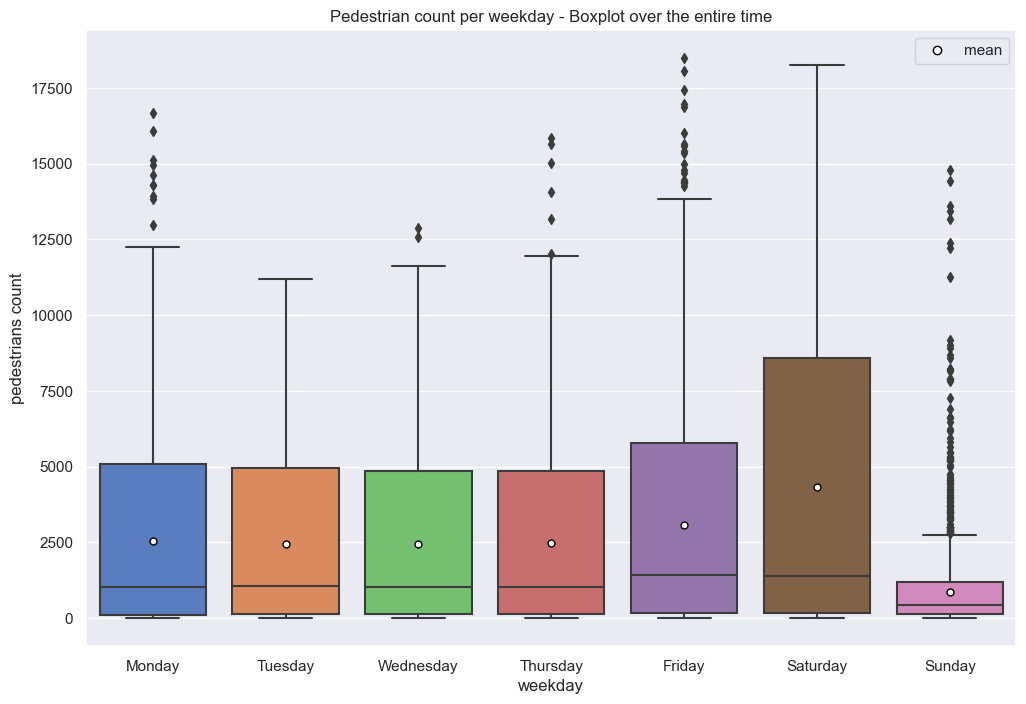

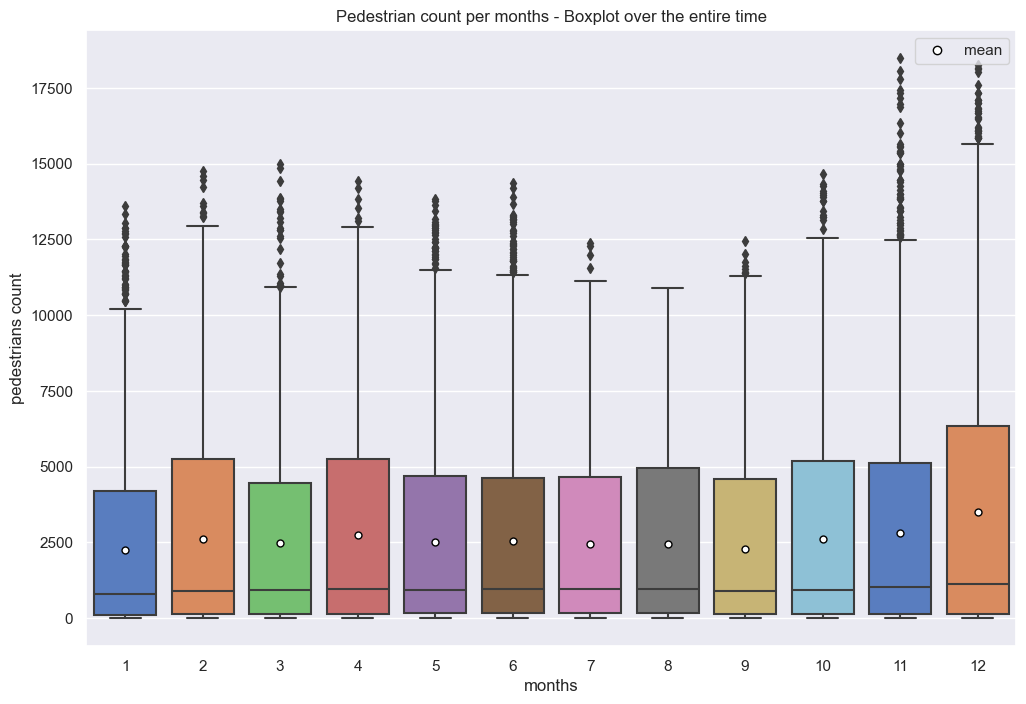

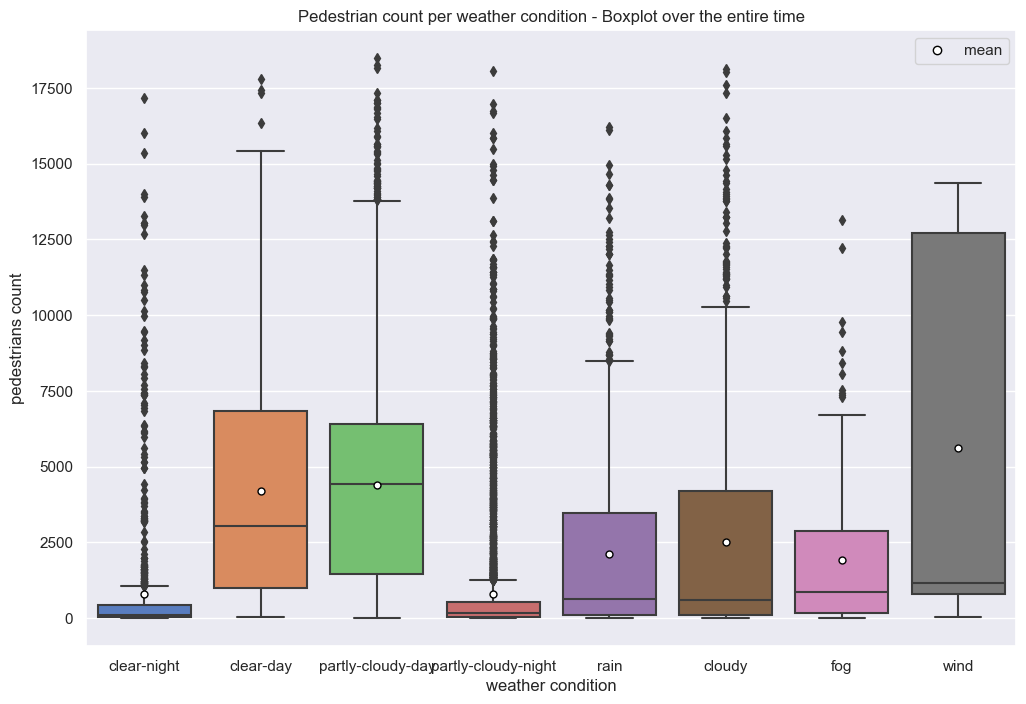

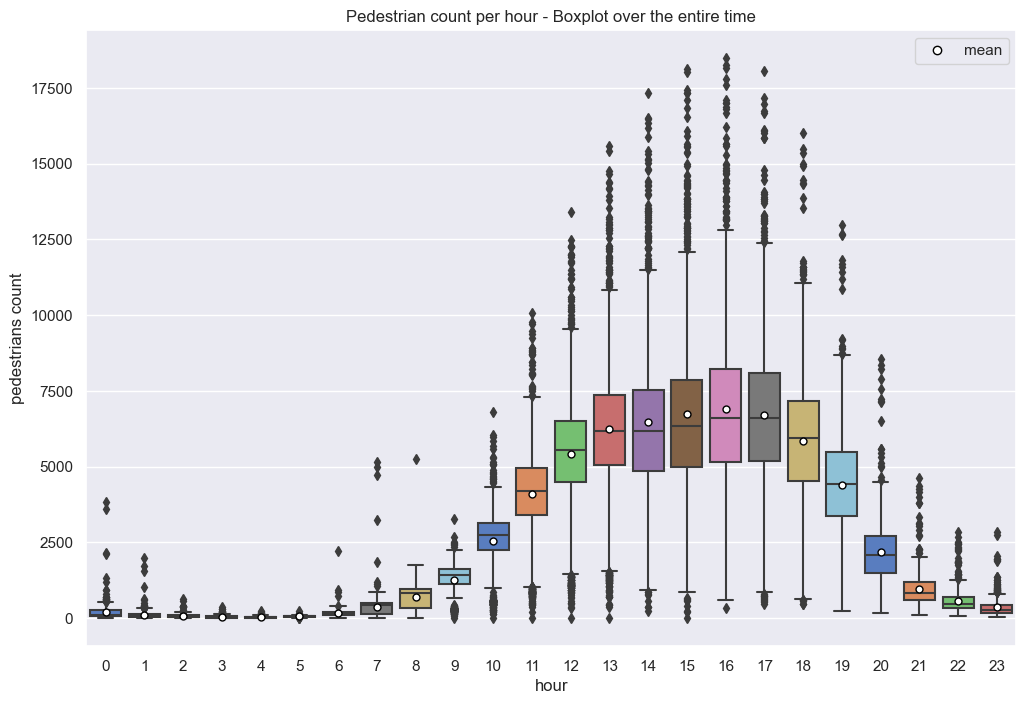

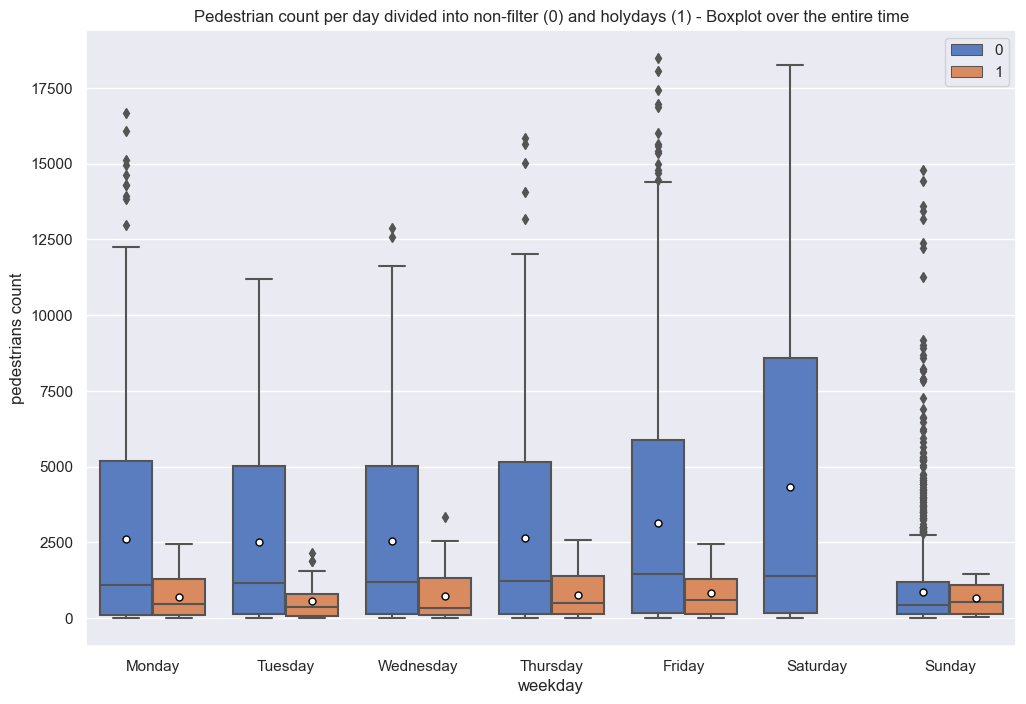

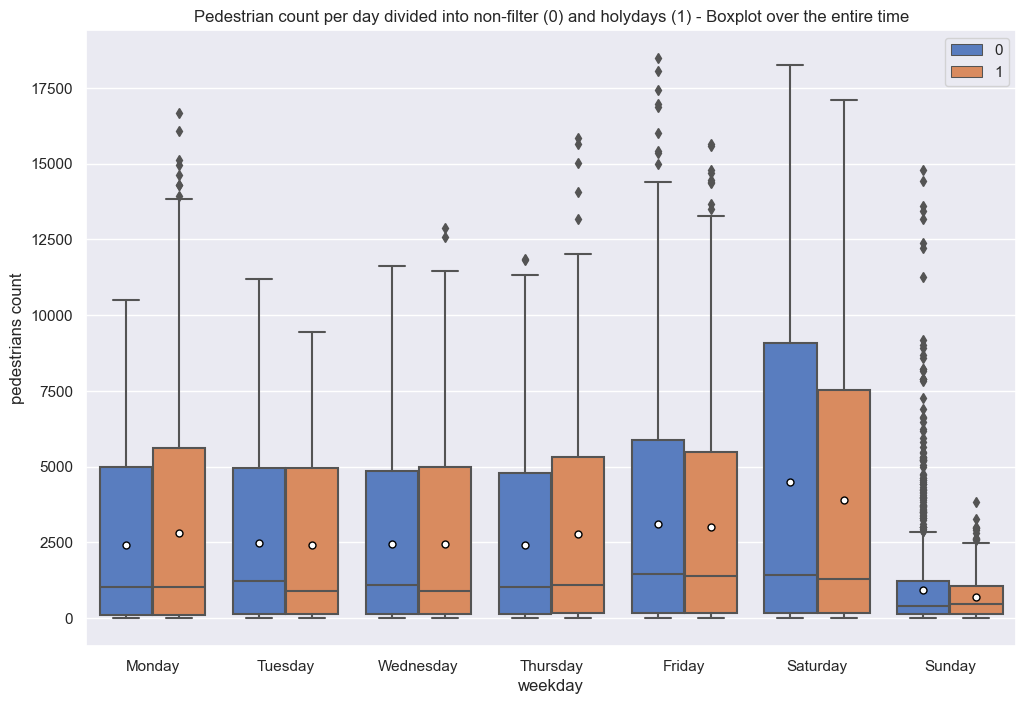

In [10]:
visualize_data("weekday")
visualize_data("months")
visualize_data("weather condition")
visualize_data("hour")
visualize_data_holiday_filter("weekday", "holiday")
visualize_data_holiday_filter("weekday", "school holiday")

# creating list for the function to call plots
names_visualization = ["weekday", "months", "weather condition", "hour", "weekday_holiday", "weekday_school holiday"]

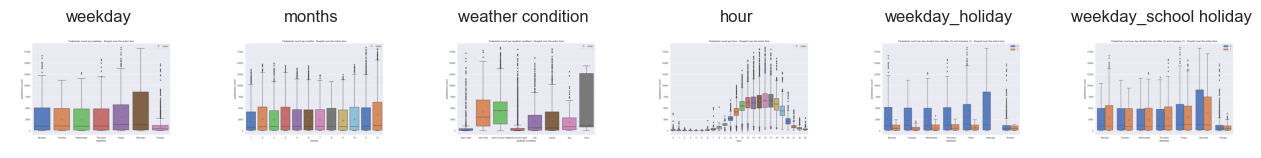

In [11]:
# Define a function to create figure frome saved pictures
def show_images_visualization(parameter_list):
    fig = plt.figure(figsize=(16, 8*len(parameter_list)))
    
    # Set the row and column number
    rows = 1
    columns = (len(parameter_list))
    
    # Go throug all parameters of the model
    i = 1
    for feature in parameter_list:
        # Reading images
        img = Image.open(f"plots/visualization_{feature}.png")
        # Adds a subplot at the i position
        fig.add_subplot(rows, columns, i)
        i += 1
        # Showing the Image
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{feature}")
    

show_images_visualization(names_visualization)